<a href="https://colab.research.google.com/github/JoysgitHub/AI-COLLAB/blob/main/CNN_TIMED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/60
4/4 [==============================] - 1s 6ms/step - loss: 1.0718 - accuracy: 0.4250
Epoch 2/60
4/4 [==============================] - 0s 5ms/step - loss: 0.9827 - accuracy: 0.5167
Epoch 3/60
4/4 [==============================] - 0s 5ms/step - loss: 0.9426 - accuracy: 0.4250
Epoch 4/60
4/4 [==============================] - 0s 5ms/step - loss: 0.9060 - accuracy: 0.6417
Epoch 5/60
4/4 [==============================] - 0s 5ms/step - loss: 0.8563 - accuracy: 0.7917
Epoch 6/60
4/4 [==============================] - 0s 4ms/step - loss: 0.8118 - accuracy: 0.6750
Epoch 7/60
4/4 [==============================] - 0s 5ms/step - loss: 0.7746 - accuracy: 0.6583
Epoch 8/60
4/4 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.6583
Epoch 9/60
4/4 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.6667
Epoch 10/60
4/4 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.7583
Epoch 11/60
4/4 [======================

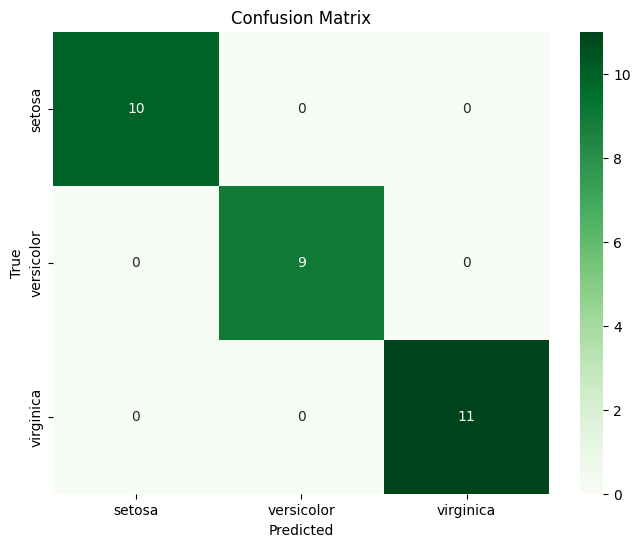

Execution time: 3.66 seconds


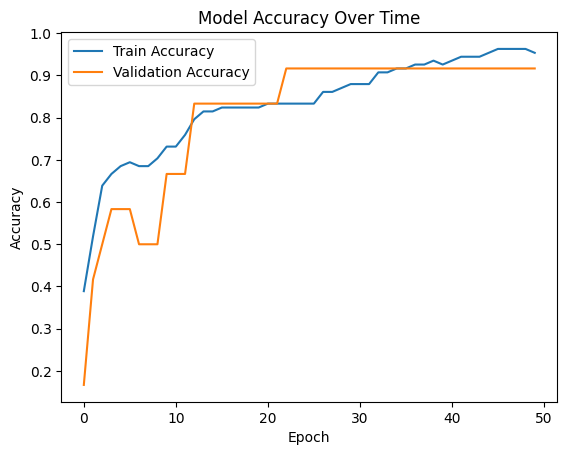

In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Record the start time
start_time = time.time()
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

# One-hot encode the target labels
y = to_categorical(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape input data for Conv1D
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(x_train, y_train, epochs=60, batch_size=32)

# End timing
end_time = time.time()
execution_time = end_time - start_time


# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy*100} %")
print(f"F1 Score: {f1*100} %")
print(f"Recall: {recall*100} %")

# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)



print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#print(conf_matrix)
print(f"Execution time: {execution_time:.2f} seconds")


# Plot accuracy over time
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()